## Market Research for FreeCodeCamp

In this project data from a survey of new users of the FreeCodeCamp will be analyzed. The goal of the project will be to make recommendations on the two primary demographics on which to spend advertising budget most effectively for an online learning platform, that is freshly starting out. The focus from a learning perspective will be on the statistical analysis of the given data.

In [1]:
# Imports
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)

In [3]:
pd.options.display.max_columns = 150
print(survey.shape)
print(survey.head(5)[:20])
print(survey.columns[70:74])

(18175, 136)
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0               

## First analysis of dataset

In total we have 136 columns and 18175 rows. This implies the participants were asked about 100 questions and 18000 people took part in the questionaire.
The website has many courses. We are only interested in a couple of them, as we are trying to establish a learning website on web developement, which is only a part of the given dataset. We should first select the information we need from the total dataset to make working with it more manageable.

Contents of the columns:

* 0: Age of participant
* 1 - 5: Whether or not the participant attended certain coding boot camps or the attendance is recommended
* 6: Number of children
* 7: population size of the participant
* 8-16: Wheter or not a participant attended certain coding events. 1 indicates attendance, NaN indicated non-attendance
* 17: Commute time of participant
* 18: CountryCitizen
* 19: CountryLive
* 20-24: Information about part's employment: EmploymentField; EmploymentFieldOther, EmploymentStatus, EmploymentStatusOther, Expected Earnings
* 25-44 : Information about the part's living/financial situation: FinanciallySupporting, FirstDevJob, Gender, GenderOther, HasChildren, HasDebt, HasFinancialDependents, HasHighspeedInternet, HasHomeMortgage, HasServedInMilitary, HasStudentDebt, HomeMortgageOwe, HoursLearning, id.x, id.y, Income, IsEthnicMinority, IsReceiveDisabilityBenefits, IsSoftwareDev, IsUnderEmployed, JobApplyWhen
* 45- 57: Job field interests: JobInterestBackEnd, JobInterestDataEngr, JobInterestDataSci, JobInterestDevOps, JobInterestFrontEnd, JobInterestFulSteck, JobInterestGameDev, JobInterestInfoSec, JobInterestMobild, JobInterestOther, JobInterestProjMgr, JobInterestQAEngr, JobInterestUX
* 57- 69: Information about the participants job preferences
* 70, 73: Information about language at home, marital status, money spent on learning






The reason for using this dataset instead of conducting our own survey is that it's much cheaper and we will probably not get the response of 18000 people unless we spend a lot of money. The dataset is also very robust and stems from a reputable source.

The dataset contains answers to a questionaire by FreeCodeAcademy on new sign ups to their site. It contains information about the job interests and education of every participant, as well as on their background at home.
This means it is ideal for our purposes, although it contains information on other coding fields, not just on web developement, the field our company provides a learning platform for. 

The dataset can be downloaded [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv).

## Analysis of the job interests of the participants:

In [4]:
freq_tb_ji = survey.JobRoleInterest.value_counts(normalize = True)*100
freq_tb_ji

Full-Stack Web Developer                                                                                                                                                                                                   11.770595
  Front-End Web Developer                                                                                                                                                                                                   6.435927
  Data Scientist                                                                                                                                                                                                            2.173913
Back-End Web Developer                                                                                                                                                                                                      2.030892
  Mobile Developer                                                                  

Finding out how many people are interested in multiple subjects:

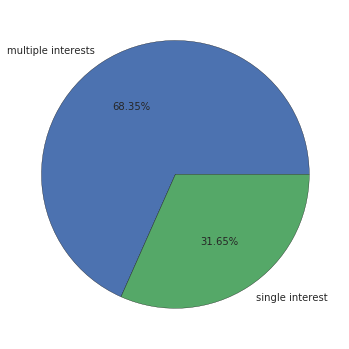

In [5]:
jobroleinterests = survey.JobRoleInterest
#Droping null values, so we can split the strings without provocing errors
jobroleinterests = jobroleinterests.dropna()

single_interests = jobroleinterests.str.split(',').apply(lambda x: len(x) == 1).value_counts(normalize = True)*100
plt.figure(figsize = (6,6))
single_interests.plot.pie(labels = ['multiple interests', 'single interest'], autopct = '%.2f%%')
plt.ylabel('')

We can see that a majority of people is interested in more than one subject.

So we see, that people can be interested in multiple job roles. But if they are interested, they are listed under a new category, that includes the names of all their interests instead of being listed multiple times in different categories.
If most people were interested in multiple job roles, the sample would no longer be representative. We might have to find a better way to categorize the job role interests. But there are columns listing them separately.
Due to this unfortunate choice in categorization, it is hard to tell, but it looks like a lot of people are interested in web and mobile developement.

In [6]:
#Finding out what part of the population in this survey are part of our demographic
mobile_or_web = jobroleinterests.str.contains('Web Developer|Mobile Developer')
print(str(round(mobile_or_web.sum()/jobroleinterests.shape[0]*100)) + '% of all participants are in our demographic')

86.0% of all participants are in our demographic


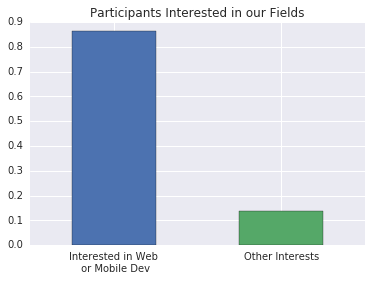

In [7]:
mobile_or_web.value_counts(normalize = True).plot.bar(title = 'Participants Interested in our Fields')
plt.xticks([0,1], ['Interested in Web\n or Mobile Dev', 'Other Interests'], rotation = 0)
plt.show()

The overwhelming majority of participants is in our demographic. So this dataset can be used effectively.

In [8]:
#Dropping all rows with NULL values in the JobRoleInterest column
print(survey.shape)
survey_no_na = survey.dropna(subset = ['JobRoleInterest'], axis = 0).copy()
print(survey_no_na.shape)

(18175, 136)
(6992, 136)


In [9]:
#Frequency tables for the countries
print(survey_no_na.CountryLive.value_counts().head())
survey_no_na.CountryLive.value_counts(normalize = True).head()*100

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64


United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: CountryLive, dtype: float64

The two most promising markets seem to be the countries with a large number of English speakers (USA, India, UK, Canada). Due to the fact that we are building a monitized website, while the data we are using is from the userbase of a free website, we should look at the ammount people are willing to spend on learning in each country, to see which countries are viable.

In [10]:
# exchanging all 0 values for months programming to 1 so we don't divide by 0
survey_no_na.loc[survey_no_na.MonthsProgramming == 0, 'MonthsProgramming'] = 1

survey_no_na['money_per_month'] = survey_no_na.MoneyForLearning/survey_no_na.MonthsProgramming

In [11]:
survey_country = survey_no_na.groupby('CountryLive')
survey_country.money_per_month.apply(np.mean)[['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

It seems like the students from the USA spend the most money, whereas the UK sticks out with the least spent per month. India, which has the second most students also spends the second most money per month on learning. So the two best markets to advertise judging by the mean to would be the USA and India. But this statement is only based on the mean, which is currently the only thing we know about the data. We should investigate the data further. But in general the data is plausible, since in the UK and Canada education is free and people will be unwilling to pay for services their government provides free of charge.

In [12]:
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
survey_no_na.dropna(subset = ['CountryLive'], inplace = True)
survey_top_4 = survey_no_na.loc[survey_no_na.CountryLive.str.
                                contains('''United States of America|India|United Kingdom|Canada''')].copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



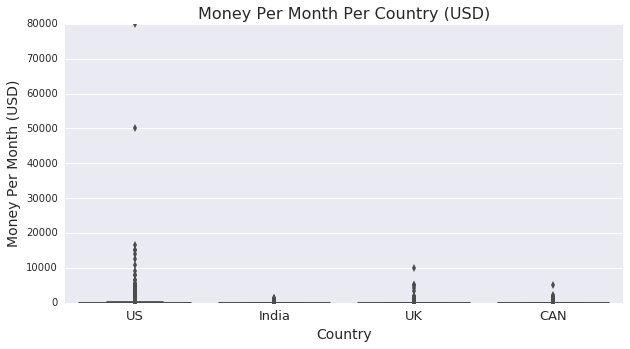

In [13]:
plt.figure(figsize = (10,5))
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = survey_top_4)
plt.title('Money Per Month Per Country (USD)', fontsize = 16)
plt.ylabel('Money Per Month (USD)', fontsize = 14)
plt.xlabel('Country', fontsize = 14)
plt.xticks([0,1,2,3], ['US', 'India', 'UK', 'CAN'], fontsize = 13)
plt.show()

This plot doesn't tell us much about the data, except that someone apparently put their terrible american college experience into the data. There are two outliers when we look at the data from the US participants. These are 80000 and 50000 usd per month. A likely cause of this unreasonable data is the phrasing of the questions. It asks how much people have spent on education and how long they have been coding. If their eduction is not in coding, they will have answered correctly and still given us unreasonable data. This is likely the cause of all datapoints of above 5000 USD per month. The way the questions are phrased in the survey makes them unsuited to ask our question. But if we want at least usable data we should exclude all datapoints above 2000 USD per month or even lower, since college eductions in almost all countries except the US cost way less than that amount.

We will start by eliminating the extreme outliers.

In [14]:
print(survey_top_4.shape)
survey_top_4 = survey_top_4.loc[survey_top_4.money_per_month < 20000]
print(survey_top_4.shape)

(4228, 137)
(3913, 137)


It seems we had to exclude quite a lot of participants

Recalculating the mean money spent per month

In [15]:
survey_top_4.groupby('CountryLive').mean()['money_per_month'].sort_values(ascending = False)

CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



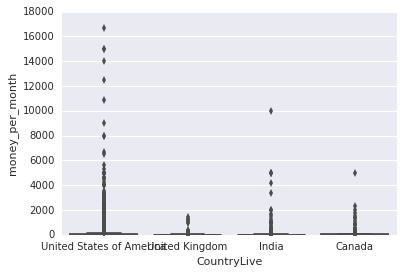

In [16]:
sns.boxplot(x = 'CountryLive', y = 'money_per_month', data = survey_top_4)

There are still seveal outliers. The US population still has a lot of people still reporting over 5000 USD per month in spending. In india there are several participants who particularly stick out. Apparently coding bootcamps are very expensive, so we need to check wethere these participants took part in any of those.

In [17]:
survey_top_4.loc[(survey_top_4.money_per_month > 3000) & (survey_top_4.CountryLive == 'India')]
bootcamp_cols = survey_top_4.columns[survey_top_4.columns.str.contains('Bootcamp', flags = re.I)].tolist()

In [18]:
print(survey_top_4.loc[(survey_top_4.money_per_month > 3000) &
                       (survey_top_4.CountryLive == 'India')
                       ,bootcamp_cols])

       AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728                0.0             NaN                NaN          NaN   
1755                0.0             NaN                NaN          NaN   
7989                0.0             NaN                NaN          NaN   
8126                0.0             NaN                NaN          NaN   
13398               0.0             NaN                NaN          NaN   
15587               0.0             NaN                NaN          NaN   

       BootcampRecommend  CodeEventWkdBootcamps  
1728                 NaN                    NaN  
1755                 NaN                    NaN  
7989                 NaN                    NaN  
8126                 NaN                    NaN  
13398                NaN                    NaN  
15587                NaN                    NaN  


So none of the participants from india who spent over 3000 USD on education reported that they attended any coding bootcamps. The solution notebook recommended removing all Indians who spent over 2500 USD on education.

In [25]:
print(survey_top_4.shape)
survey_top_4 = survey_top_4.drop(index = survey_top_4.loc[
    (survey_top_4.money_per_month > 2500)
                       & (survey_top_4.CountryLive == 'India')].index)
print(survey_top_4.shape)

(3907, 137)
(3907, 137)


The other outliers are those from the US participants. Up until 6000 USD per month the outliers are grouped together, but above they start to separate, so we will look at those.

In [27]:
print(survey_top_4.loc
    [(survey_top_4.money_per_month > 6000) &
      (survey_top_4.CountryLive == 'United States of America'),
     bootcamp_cols])

       AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
718                 1.0             0.0                0.0   
1222                1.0             0.0                0.0   
3184                1.0             1.0                0.0   
3930                0.0             NaN                NaN   
6805                1.0             1.0                1.0   
7198                0.0             NaN                NaN   
7505                1.0             0.0                1.0   
9778                1.0             0.0                1.0   
16650               0.0             NaN                NaN   
16997               0.0             NaN                NaN   
17231               0.0             NaN                NaN   

                                 BootcampName  BootcampRecommend  \
718    The Coding Boot Camp at UCLA Extension                1.0   
1222                            The Iron Yard                1.0   
3184                           We Can Code IT      

So most of the Americans that have spent so much on education have also attended bootcamps. This means that probably this information seems reliable and we can keep the data points in the analysis

In [32]:
survey_top_4.groupby('CountryLive').mean().money_per_month.sort_values(ascending = False)

CountryLive
United States of America    183.800110
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
Name: money_per_month, dtype: float64

According to these results, The two best markets for advertising would be those of the US and Canada.
Though it should be said, that there are more potential customers in India, since more of the participants in the original survey were from India. So advertising there might not be such a bad idea. So more analysis is needed.

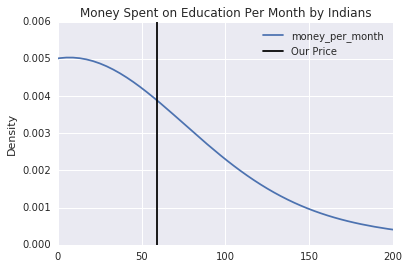

In [61]:
data_countries = survey_top_4.groupby('CountryLive')
data_countries.get_group('India').money_per_month.plot.kde(
    title = 'Money Spent on Education Per Month by Indians',
    xlim = (0,200))
plt.axvline(59, color = 'k', label = 'Our Price')
plt.legend()
plt.show()

We can see that only a small group is willing to pay as much money as we would be asking in India

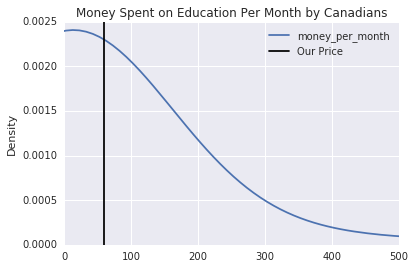

In [60]:
data_countries.get_group('Canada').money_per_month.plot.kde(xlim = (0,500),
    title = 'Money Spent on Education Per Month by Canadians')
plt.axvline(59, color = 'k', label = 'Our Price')
plt.legend()
plt.show()

In general the Canadians also seem very unhappy with spending the ammount we would ask or more on educatin.

we could also look at the z_values for our price for both of the countries, to find out how willing to pay people are

In [63]:
def z_val(val, arr):
    return (val - np.mean(arr)) / np.std(arr)

In [69]:
print('Z-value in India: '+
      str(round(z_val(59, data_countries.get_group('India').money_per_month),4)))
print('Z-value in Canada: '+
      str(round(z_val(59, data_countries.get_group('Canada').money_per_month),4)))

Z-value in India: -0.029
Z-value in Canada: -0.1239


Looking at the different z-values, we can see that in canada our price has a lower z-value. This means, that people are more likely to pay this amount of money.

To put this data into perspective, we should look at what percentage of potential customers actually comes from what country.

In [70]:
survey_top_4.CountryLive.value_counts(normalize = True)*100

United States of America    75.019196
India                       11.696954
United Kingdom               7.141029
Canada                       6.142821
Name: CountryLive, dtype: float64

We can see that a large majority of our potential user base comes from the US. This in addition to the fact that Americans are the largest spenders on average implies the idea, that a large majority of the advertising budget should be spent on the US market. 
It might be a good ides just to advertise in the US at first and explore expansion into later markets later on. The US is ideal for this sort of monitized education, since they pay horrendous sums of money for their college education and our service will seem like a bargain.
If there was a marketing team in the company, their descision would be more educated on these matters.

## Conclusion

In this project, data from a survey conducted by the website FreeCodingAcademy was analyzed with the intent of being able to make well-founded marketing descisions in a new education platform focused on Web and Mobile developement. 
The results showed that in this case the main focus of the advertising campaign should be the US. As a second market, Canada might be interesting, but this is not clear, since there are a lot less potential users in canada and they are willing to spend less on education.
